# Import Library

In [110]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

In [111]:
dataset = pd.read_excel('https://raw.githubusercontent.com/ikiearth/GEOLOGIC-CLUSTERING/main/Chapter4_Geologic_DataSet.xlsx')
dataset.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,118,2.2096,23,0.13,23,0.077,10670
1,170,2.2185,21,0.17,20,0.073,9932
2,166,2.2260,14,0.20,21,0.070,9747
3,166,2.2260,14,0.20,21,0.070,9747
4,135,2.2303,22,0.16,24,0.068,9222


In [112]:
dataset.drop(['TOC, fraction'], axis=1, inplace=True)

In [113]:
dataset.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
0,118,2.2096,23,0.13,23,10670
1,170,2.2185,21,0.17,20,9932
2,166,2.2260,14,0.20,21,9747
3,166,2.2260,14,0.20,21,9747
4,135,2.2303,22,0.16,24,9222


# Standardization

In [114]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
dataset_scaled= scaler.fit(dataset)
dataset_scaled= scaler.transform(dataset)

dataset_scaled= pd.DataFrame(dataset_scaled, columns=dataset.columns)

In [115]:
dataset_scaled.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,0.888564
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,-0.003779
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,-0.862267


# DBSCAN Clustering

In [116]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dataset_scaled)
distances, indices = nbrs.kneighbors(dataset_scaled)

In [117]:
# distances = np.sort(distances, axis=0)
# distances

In [118]:
distances

array([[0.        , 0.12263267],
       [0.        , 0.77019754],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.31634296],
       [0.        , 0.46543553],
       [0.        , 0.20817949],
       [0.        , 0.50160947],
       [0.        , 0.69653749],
       [0.        , 0.70082945],
       [0.        , 0.61205599],
       [0.        , 0.19820246],
       [0.        , 0.51234398],
       [0.        , 0.24333786],
       [0.        , 0.69653749],
       [0.        , 1.01525983],
       [0.        , 0.15634363],
       [0.        , 0.19758118],
       [0.        , 0.30810242],
       [0.        , 0.6282486 ],
       [0.        , 1.12874296],
       [0.        , 0.46197856],
       [0.        , 0.49725662],
       [0.        , 0.63948115],
       [0.        , 0.46212712],
       [0.        , 0.07016756],
       [0.        , 0.44272945],
       [0.        , 0.13784398],
       [0.        , 0.32720475],
       [0.        , 0.37140012],
       [0.

In [119]:
np.sort(distances[:,1])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01692792, 0.01692792,
       0.02539189, 0.02539189, 0.06287515, 0.06287515, 0.07016756,
       0.07016756, 0.096731  , 0.096731  , 0.10230731, 0.10230731,
       0.1160772 , 0.1160772 , 0.11728634, 0.11728634, 0.12263267,
       0.12263267, 0.12528254, 0.12528254, 0.12941042, 0.12941042,
       0.13419316, 0.13419316, 0.13784398, 0.13784398, 0.14025995,
       0.14025995, 0.1426578 , 0.1426578 , 0.14473722, 0.14473722,
       0.15498478, 0.15498478, 0.15634363, 0.15634363, 0.15701897,
       0.15701897, 0.16565184, 0.16565184, 0.17184514, 0.17184514,
       0.17926317, 0.17926317, 0.18001704, 0.18001704, 0.18137062,
       0.18137062, 0.19447752, 0.19758118, 0.19820246, 0.19820246,
       0.20737568, 0.20737568, 0.20817949, 0.20817949, 0.20834139,
       0.22348678, 0.22983021, 0.23749308, 0.23749308, 0.24333786,
       0.24333786, 0.24609479, 0.24609479, 0.2515006 , 0.25150

In [120]:
distances[:,1]

array([0.12263267, 0.77019754, 0.        , 0.        , 0.31634296,
       0.46543553, 0.20817949, 0.50160947, 0.69653749, 0.70082945,
       0.61205599, 0.19820246, 0.51234398, 0.24333786, 0.69653749,
       1.01525983, 0.15634363, 0.19758118, 0.30810242, 0.6282486 ,
       1.12874296, 0.46197856, 0.49725662, 0.63948115, 0.46212712,
       0.07016756, 0.44272945, 0.13784398, 0.32720475, 0.37140012,
       3.46821862, 0.54830506, 0.5451075 , 0.3972356 , 0.55579763,
       0.16565184, 0.14473722, 0.35098437, 0.31063696, 0.        ,
       0.        , 0.17926317, 0.61202537, 0.17184514, 0.43726301,
       0.90465335, 1.04358597, 0.51749242, 0.02539189, 0.54848184,
       0.        , 0.        , 0.11728634, 0.44859934, 0.11728634,
       0.33547012, 0.15634363, 0.53977215, 0.472222  , 0.3057956 ,
       0.36698772, 0.12941042, 0.12263267, 0.84679799, 0.13784398,
       0.41520567, 0.46360013, 1.34710388, 1.14804065, 0.59588728,
       0.17184514, 0.43970093, 0.47032578, 0.32920564, 0.61558

In [121]:
# indices = np.sort(indices, axis=0)
# indices

In [122]:
indices

array([[  0,  62],
       [  1, 321],
       [  3,   2],
       [  3,   2],
       [  4, 181],
       [  5, 185],
       [  6, 199],
       [  7,  21],
       [  8,  14],
       [  9,  65],
       [ 10,  33],
       [ 11, 153],
       [ 12, 402],
       [ 13, 174],
       [ 14,   8],
       [ 15, 125],
       [ 16,  56],
       [ 17,  41],
       [ 18,  92],
       [ 19, 366],
       [ 20, 159],
       [ 21, 155],
       [ 22,  85],
       [ 23, 407],
       [ 24, 134],
       [ 25, 165],
       [ 26, 110],
       [ 27,  64],
       [ 28, 168],
       [ 29,   2],
       [ 30, 285],
       [ 31,  98],
       [ 32,  84],
       [ 33, 136],
       [ 34, 120],
       [ 35, 283],
       [ 36, 163],
       [ 37, 208],
       [ 38, 113],
       [ 40,  39],
       [ 40,  39],
       [ 41,  77],
       [ 42, 187],
       [ 43,  70],
       [ 44, 119],
       [ 45, 224],
       [ 46, 405],
       [ 47, 127],
       [ 48, 146],
       [ 49, 265],
       [ 51,  50],
       [ 51,  50],
       [ 52,

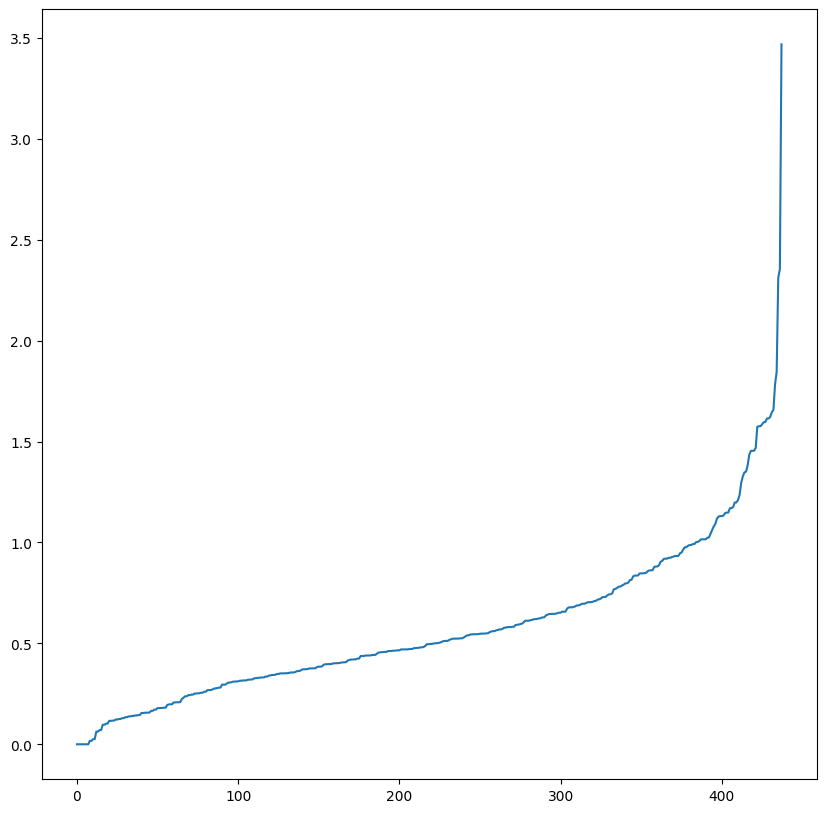

In [123]:
fig = plt.figure(figsize=(10, 10))

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [124]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=12).fit(dataset_scaled)

In [125]:
clustering.labels_

array([ 0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [126]:
pd.DataFrame(clustering.labels_).value_counts()

 0    421
-1     17
dtype: int64

In [127]:
from sklearn.metrics import silhouette_score

silhouette_score(dataset_scaled, clustering.labels_)

0.3849286597096944

# Hyperparameter Tuning

In [128]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'eps':np.arange(1, 1.5, 2, 2.5), 'min_samples':np.arange(6, 10, 15)}
# search = GridSearchCV(DBSCAN(), parameters)
# search.fit(dataset_scaled)

In [129]:
eps_range = [1, 1.5, 2, 2.5]
sample_range = [6, 10, 15]

for i in range(len(eps_range)):
    for j in range(len(sample_range)):
        clustering = DBSCAN(eps=eps_range[i], min_samples=sample_range[j]).fit(dataset_scaled)
        print('eps=', eps_range[i], 'min_samples=', sample_range[j], 'silhouette=', silhouette_score(dataset_scaled, clustering.labels_))

eps= 1 min_samples= 6 silhouette= -0.14576077316448446
eps= 1 min_samples= 10 silhouette= 0.0534937158058309
eps= 1 min_samples= 15 silhouette= 0.04592208542121753
eps= 1.5 min_samples= 6 silhouette= 0.3354703537441477
eps= 1.5 min_samples= 10 silhouette= 0.3218562172477151
eps= 1.5 min_samples= 15 silhouette= 0.29936003763161817
eps= 2 min_samples= 6 silhouette= 0.38143054602751797
eps= 2 min_samples= 10 silhouette= 0.3791571318692464
eps= 2 min_samples= 15 silhouette= 0.3849286597096944
eps= 2.5 min_samples= 6 silhouette= 0.413621024173453
eps= 2.5 min_samples= 10 silhouette= 0.40985875870871674
eps= 2.5 min_samples= 15 silhouette= 0.4196042976080372
